# Capstone 2 EDA

**The Data Science Method**  

1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Data Collection

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load the csv files in data/processed folder
df24 = pd.read_csv('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\data\\processed\\df24.csv', index_col='Date')
df2016 = pd.read_csv('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\data\\processed\\df2016.csv', index_col='Date')
df2017 = pd.read_csv('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\data\\processed\\df2017.csv', index_col='Date')
# change indexes to time series
df24.index = pd.to_datetime(df24.index)
df2016.index = pd.to_datetime(df2016.index)
df2017.index = pd.to_datetime(df2017.index)
df24.head()

,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Daily
Date,,,,,,,,,,,,,,
2016-01-04,16.39,36.27,78.68,51.44,57.70,148.93,74.55,50.34,56.02,79.35,58.34,31.68,0.00,739.69
2016-01-05,22.45,27.75,7.25,30.64,100.67,149.72,43.14,68.53,93.65,75.90,27.45,31.70,0.00,678.85
2016-01-06,33.59,41.48,111.56,92.00,94.83,94.27,45.26,70.35,57.22,52.53,46.87,49.12,0.00,789.08
2016-01-07,8.40,23.30,54.49,42.28,116.13,101.65,52.04,47.96,128.00,77.01,91.02,75.42,0.00,817.70
2016-01-08,27.25,86.00,48.34,65.21,186.20,158.67,93.76,117.30,143.23,105.70,182.96,89.71,64.12,1368.45


In [3]:
# also load the time series df
dfts = pd.read_csv('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\data\\processed\\dfts.csv', index_col='Date')
dfts.index = pd.to_datetime(dfts.index)
dfts.head()

,sales
Date,
2016-01-04 11:00:00,16.39
2016-01-04 12:00:00,36.27
2016-01-04 13:00:00,78.68
2016-01-04 14:00:00,51.44
2016-01-04 15:00:00,57.70


# EXPLORATORY ANALYSIS

In [4]:
#in order to plot both 2016 and 2017 in the same graph, we'll reset the index
df2016r = df2016.reset_index(drop=True)
df2017r = df2017.reset_index(drop=True)
df2016r.head()

,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Daily
0,16.39,36.27,78.68,51.44,57.70,148.93,74.55,50.34,56.02,79.35,58.34,31.68,0.00,739.69
1,22.45,27.75,7.25,30.64,100.67,149.72,43.14,68.53,93.65,75.90,27.45,31.70,0.00,678.85
2,33.59,41.48,111.56,92.00,94.83,94.27,45.26,70.35,57.22,52.53,46.87,49.12,0.00,789.08
3,8.40,23.30,54.49,42.28,116.13,101.65,52.04,47.96,128.00,77.01,91.02,75.42,0.00,817.70
4,27.25,86.00,48.34,65.21,186.20,158.67,93.76,117.30,143.23,105.70,182.96,89.71,64.12,1368.45


In [5]:
#let's check the number of days in each data
print('df2016r has ' + str(len(df2016r)) + ' days of data, starting with Monday.')
print('df2017r has ' + str(len(df2017r)) + ' days of data, starting with Monday.')

df2016r has 364 days of data, starting with Monday.
df2017r has 364 days of data, starting with Monday.


# Daily Sales (Day of the Year with 364 days)

In [6]:
# define a function to do the covariance/correlation calculation
from numpy import cov
from scipy.stats import pearsonr
def covr_calc(df1, df2):
    covariance = cov(df1, df2)
    print('covariance:' + str(covariance))
    #Pearson’s Correlation
    pearson = pearsonr(df1, df2)
    print('pearson:' + str(pearson))

In [7]:
covr_calc(df2016['Daily'], df2017['Daily'])

covariance:[[58886.50220385 20852.0989184 ]
 [20852.0989184  68506.57827914]]
pearson:(0.3283036862879891, 1.3544716251149805e-10)


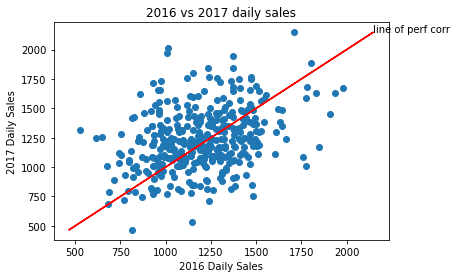

In [8]:
# use a plot for visual, we'll simply have x as 2016's daily sales and y as 2017's
plt.scatter(df2016.Daily, df2017.Daily)
plt.plot(df2017.Daily, df2017.Daily, 'r')     #the line of perfect correlation
plt.annotate('line of perf corr', xy = (max(df2017.Daily), max(df2017.Daily)))
# Labels
plt.xlabel('2016 Daily Sales')
plt.ylabel('2017 Daily Sales')
plt.title('2016 vs 2017 daily sales')
plt.show()

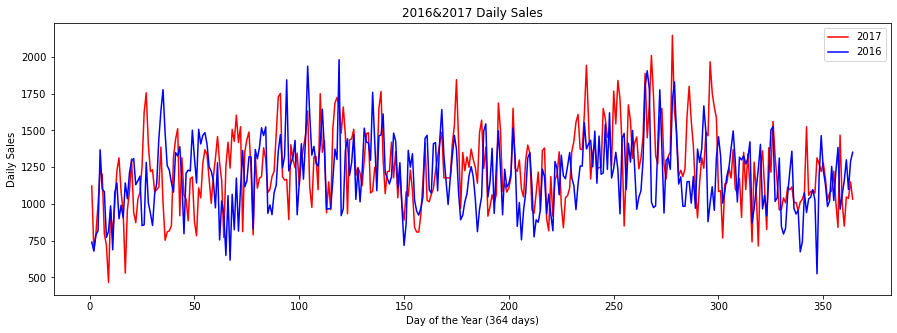

In [9]:
# let's do a line plot of 2017 daily / 2016 daily, it should be a flat line all across if the correlation is high
# first, let's creat a list that has the 2017 Daily / 2016 Daily's values
fig= plt.figure(figsize=(15,5))
plt.plot(range(1, 365), df2017.Daily, 'r')
plt.plot(range(1,365), df2016.Daily, 'b')
plt.legend(['2017', '2016'])
# Labels
plt.xlabel('Day of the Year (364 days)')
plt.ylabel('Daily Sales')
plt.title('2016&2017 Daily Sales')
plt.show()

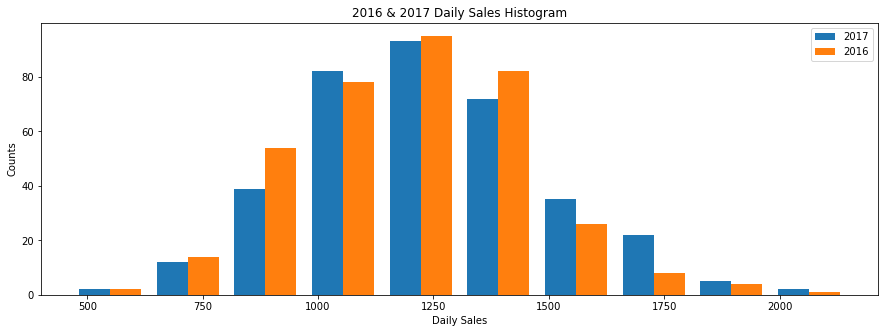

In [10]:
# let's take at a histogram visual of the daily sales between 2016 and 2017
fig= plt.figure(figsize=(15,5))
plt.hist([df2017.Daily,df2016.Daily])
plt.legend(['2017', '2016'])
# Labels
plt.xlabel('Daily Sales')
plt.ylabel('Counts')
plt.title('2016 & 2017 Daily Sales Histogram')
plt.show()

The correlation and covariance were all positive, indicating that when the sales at a certain day is increasing in 2016 it is likely to be increasing in 2017 as well. But the correlation isn't high (both the number and the visual weren't obvious). Then if we look at the daily sales between 2017 & 2016, we can see that the sales have lots of up and downs, but there are some over lapping between them, suggesting seasonality/trend.

# Monthly Sales

In [11]:
# get the monthly sales
monthly2016 = df2016r.Daily.groupby(df2016.index.month).sum()
monthly2017 = df2017r.Daily.groupby(df2017.index.month).sum()

# let's do a list comprehension to store the values so we can do stats on them
monthly2016 = [monthly2016[i] for i in range(1,13)]
monthly2017 = [monthly2017[i] for i in range(1,13)]
monthly2016

[29670.498888888887,
 37205.3237037037,
 34261.16240591398,
 39669.840000000004,
 40581.59999999999,
 35244.50999999999,
 35850.027058823536,
 36106.89000000001,
 39045.18000000001,
 38924.41,
 35246.587941176476,
 33431.25558404558]

In [12]:
# calculate covariance matrix/correlation
covr_calc(monthly2016, monthly2017)

covariance:[[ 9429131.84205029  8756447.55117195]
 [ 8756447.55117195 18436901.06482946]]
pearson:(0.6641224080884999, 0.018503889430860062)


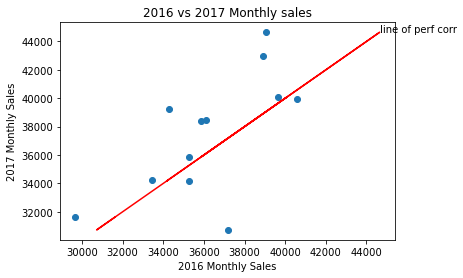

In [13]:
# use a plot for visual
data1=monthly2016
data2=monthly2017
plt.scatter(data1, data2)
plt.plot(data2, data2, 'r')     #the line of perfect correlation
plt.annotate('line of perf corr', xy = (max(data2), max(data2)))
# Labels
plt.xlabel('2016 Monthly Sales')
plt.ylabel('2017 Monthly Sales')
plt.title('2016 vs 2017 Monthly sales')
plt.show()

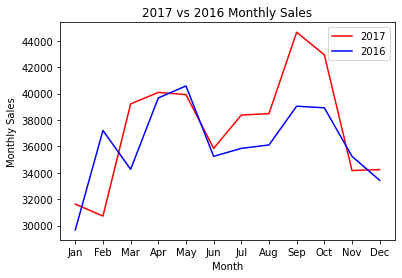

In [16]:
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_list, data2, 'r')
plt.plot(month_list, data1, 'b')
plt.legend(['2017', '2016'])

# Labels
plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.title('2017 vs 2016 Monthly Sales')
plt.show()

We can see that the month to month comparison has the correlation going from 0.33 increased to 0.64! And from the visuals, we can see there's much more correlation as well. The p value is 0.0185, we will reject the null hypothesis, the month of the year is a variable that may influence the sales, but based on the visual, it looks like not every month to month has the same trend. The following months are moving at the same direction: March to April (up), May to June (down), Jun to Sep (up), Sep to Nov (down). The following are moving the opposite of each other: Jan to Feb, Feb to Mar, April to May, Nov to Dec.
In simpler words, only 4 out of the 12 months the trend of the sales aren't going in the same direction, while 8 out of the 12 months the sales are moving towards the same direction.

# Weekly Sales

In [17]:
# get the weekly sales
weekly2016 = df2016r.Daily.groupby(df2016.index.week).sum()
weekly2017 = df2017r.Daily.groupby(df2017.index.week).sum()

# let's do a list comprehension to store the values so we can do stats on them
weekly2016 = [weekly2016[i] for i in range(1,53)]
weekly2017 = [weekly2017[i] for i in range(1,53)]

In [18]:
# calculate covariance matrix/correlation for weekly sales
covr_calc(weekly2016, weekly2017)

covariance:[[ 927969.12269571  494753.51414556]
 [ 494753.51414556 1300701.19752039]]
pearson:(0.4503325664206068, 0.0008084054642529281)


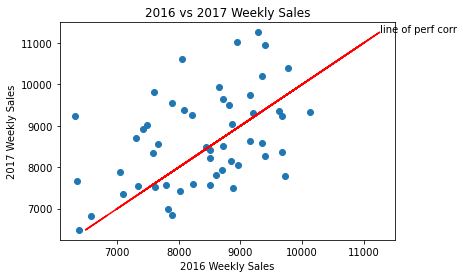

In [19]:
# weeklysales visual
# use a plot for visual
data1=weekly2016
data2=weekly2017
plt.scatter(data1, data2)
plt.plot(data2, data2, 'r')     #the line of perfect correlation
plt.annotate('line of perf corr', xy = (max(data2), max(data2)))
# Labels
plt.xlabel('2016 Weekly Sales')
plt.ylabel('2017 Weekly Sales')
plt.title('2016 vs 2017 Weekly Sales')
plt.show()

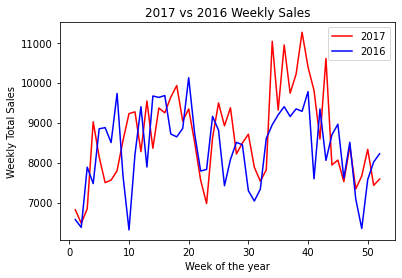

In [20]:
plt.plot(range(1, 53), data2, 'r')
plt.plot(range(1, 53), data1, 'b')
plt.legend(['2017', '2016'])

# Labels
plt.xlabel('Week of the year')
plt.ylabel('Weekly Total Sales')
plt.title('2017 vs 2016 Weekly Sales')
plt.show()

With pearson:(0.44499433282102235, 0.0009483289375837) there is some correlation, it's not as strong as monthly sum's correlation.

# Day of the Week's Sales

In [21]:
# get the day of the week sales' sum
dowsum2016gb = df2016r.Daily.groupby(df2016.index.dayofweek).sum()
dowsum2017gb = df2017r.Daily.groupby(df2017.index.dayofweek).sum()

# let's do a list comprehension to store the values so we can do stats on them
dowsum2016 = [dowsum2016gb[i] for i in range(7)]
dowsum2017 = [dowsum2017gb[i] for i in range(7)]

# make a day of week list to help with iteration
dow_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# make a dataframe to store and view the data
dowsum_df = pd.DataFrame(dowsum2016, columns=['2016'])
dowsum_df['2017'] = dowsum2017
dowsum_df['DoW'] = dow_list
dowsum_df.set_index('DoW', inplace=True)
dowsum_df

,2016,2017
DoW,,
Mon,56396.622581,58660.300968
Tue,56741.775497,60544.960968
Wed,59459.960000,58684.391004
Thu,57016.847142,60961.014084
Fri,65669.288831,69303.220113
Sat,70283.705584,73723.276779
Sun,69669.085948,68409.052356


In [22]:
# calculate covariance matrix/correlation
covr_calc(dowsum2016, dowsum2017)

covariance:[[38501670.08556966 35024403.38430666]
 [35024403.38430666 36550021.48204018]]
pearson:(0.9336565400827259, 0.0021005669443213445)


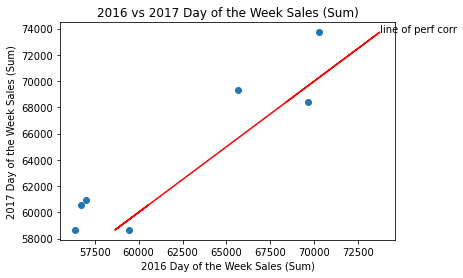

In [23]:
# use a plot for visual
data1=dowsum2016
data2=dowsum2017
plt.scatter(data1, data2)
plt.plot(data2, data2, 'r')     #the line of perfect correlation
plt.annotate('line of perf corr', xy = (max(data2), max(data2)))
# Labels
plt.xlabel('2016 Day of the Week Sales (Sum)')
plt.ylabel('2017 Day of the Week Sales (Sum)')
plt.title('2016 vs 2017 Day of the Week Sales (Sum)')
plt.show()

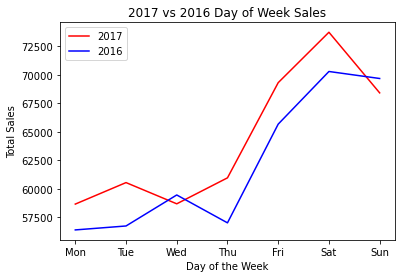

In [24]:
plt.plot(dow_list, data2, 'r')
plt.plot(dow_list, data1, 'b')
plt.legend(['2017', '2016'])

# Labels
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('2017 vs 2016 Day of Week Sales')
plt.show()

In [25]:
# use the function to read the data into sales by day of week
# create a dict to iterrate
dow_iter_dict = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}
# create an empty dict to store data
dow2016 = {}
for i, j in dow_iter_dict.items():
    dow2016[i] = [df2016r.Daily[i+j] for i in range(0, 364, 7)]
dow2017 = {}
for i, j in dow_iter_dict.items():
    dow2017[i] = [df2017r.Daily[i+j] for i in range(0, 364, 7)]

In [26]:
#check n see if there are 52 weeks
len(dow2017['Mon'])

52

In [27]:
# convert the dict to pandas df
dow2016 = pd.DataFrame.from_dict(dow2016)
dow2017 = pd.DataFrame.from_dict(dow2017)
dow2016.head()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,739.69,678.85,789.08,817.70,1368.45,1099.40,1083.620000
1,771.85,814.34,986.86,687.38,1077.86,1142.77,898.958889
2,990.65,904.19,1143.15,1034.86,1211.83,1292.85,1308.590000
3,1130.68,1157.04,1188.60,851.66,857.81,1282.69,1007.750000
4,934.56,852.53,1066.61,1140.14,1440.86,1633.75,1778.130000


In [28]:
# print the correlation and covariances    
for i in dow_list:
    print(i)
    covr_calc(dow2016[i], dow2017[i])
    print('')

Mon
covariance:[[47170.09584181  9379.56882821]
 [ 9379.56882821 64977.02770157]]
pearson:(0.16942191047648814, 0.22985851591966402)

Tue
covariance:[[39674.50304738 10303.68157599]
 [10303.68157599 80492.63459292]]
pearson:(0.18233020060702346, 0.19576355145691735)

Wed
covariance:[[63461.6679641   9885.54096005]
 [ 9885.54096005 52020.0391938 ]]
pearson:(0.17205185569370432, 0.2226000907152999)

Thu
covariance:[[44728.15812046  3122.22828547]
 [ 3122.22828547 38001.20989147]]
pearson:(0.07573130394188161, 0.5936195605773434)

Fri
covariance:[[31366.88048422 11339.84466231]
 [11339.84466231 60400.27552299]]
pearson:(0.26052654557162125, 0.06212945905658016)

Sat
covariance:[[54737.52311875 15790.44631012]
 [15790.44631012 46468.19987635]]
pearson:(0.3130933980842946, 0.0238201629811029)

Sun
covariance:[[50886.65976659  9355.83827602]
 [ 9355.83827602 62553.90232529]]
pearson:(0.16582634557072698, 0.24004362598435833)



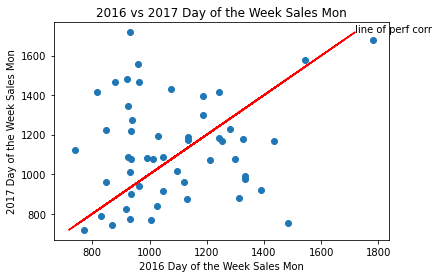

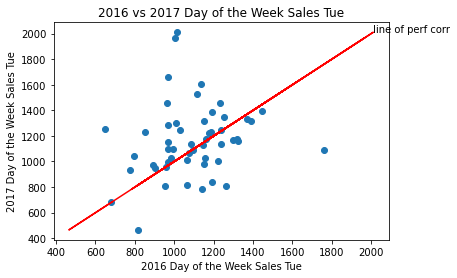

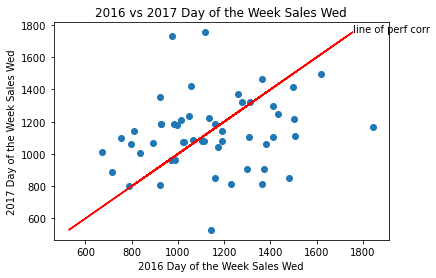

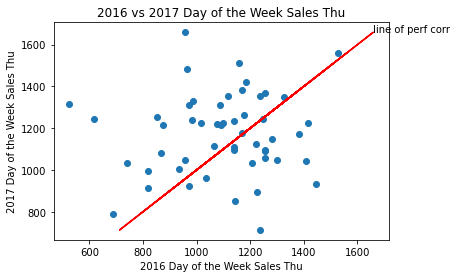

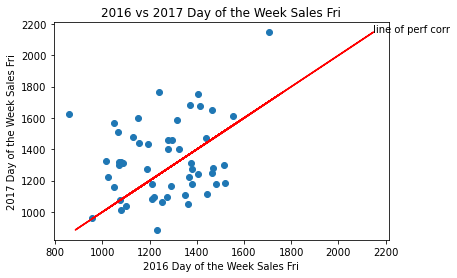

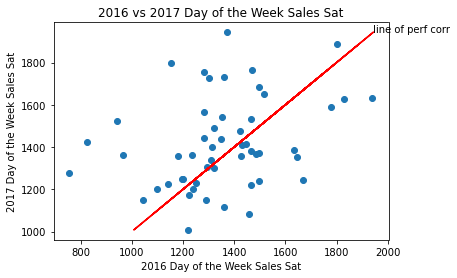

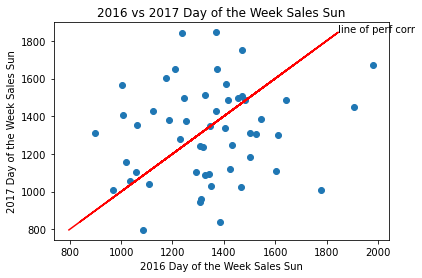

In [29]:
# use a plot for visual
for i in dow_list:
    data1=dow2016[i]
    data2=dow2017[i]
    plt.scatter(data1, data2)
    plt.plot(data2, data2, 'r')     #the line of perfect correlation
    plt.annotate('line of perf corr', xy = (max(data2), max(data2)))
    # Labels
    plt.xlabel('2016 Day of the Week Sales ' + i)
    plt.ylabel('2017 Day of the Week Sales ' + i)
    plt.title('2016 vs 2017 Day of the Week Sales ' + i)
    plt.show()

In [30]:
# melt the dfs to prepare for seaborn plots
dow2016m = pd.melt(dow2016, value_vars=dow2016.columns, var_name='Day of Week', value_name='Daily Sales')
dow2017m = pd.melt(dow2017, value_vars=dow2017.columns, var_name='Day of Week', value_name='Daily Sales')

# add the year value to distinguish
dow2016m['year'] = '2016'
dow2017m['year'] = '2017'

dow24m = pd.concat([dow2016m, dow2017m])
dow24m.head()

,Day of Week,Daily Sales,year
0,Mon,739.69,2016
1,Mon,771.85,2016
2,Mon,990.65,2016
3,Mon,1130.68,2016
4,Mon,934.56,2016


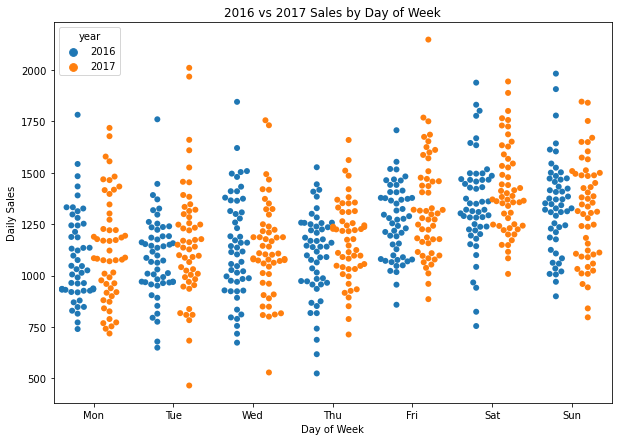

In [31]:
# using seaborn swarm plots to compare DoW sales side by side
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('2016 vs 2017 Sales by Day of Week')
sns.swarmplot(x='Day of Week', y='Daily Sales', hue='year', data=dow24m, dodge=True, size=6, ax=ax)

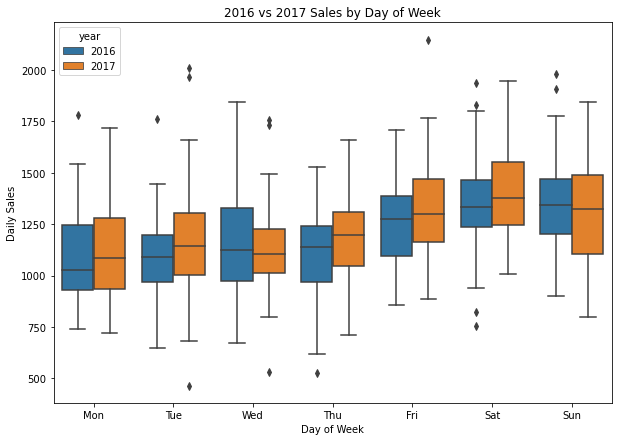

In [32]:
# using seaborn boxplot plots to compare DoW sales side by side
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('2016 vs 2017 Sales by Day of Week')
sns.boxplot(x='Day of Week', y='Daily Sales', hue='year', data=dow24m, dodge=True, ax=ax)

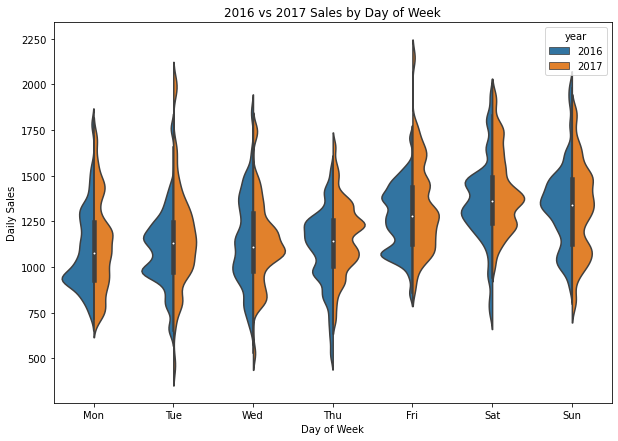

In [33]:
# using seaborn violin plots to compare DoW sales side by side
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('2016 vs 2017 Sales by Day of Week')
sns.violinplot(x='Day of Week', y='Daily Sales', hue='year', data=dow24m, split=True, bw=0.2, ax=ax)

We can see that the Sum of the day of the week's sales in a yearly comparison has correlation of 0.934 with pvalue of 0.002. But if we're to comepare day of week's sales by day of the week for each day of the week between 2017&2016 (e.g. 52 monday sales from 2016 vs 52 monday sales from 2017), the correlation doesn't seem to exist. However, if we're to use the seaborn plots to visual the data of these 52 weeks of sales between 2016 and 2017, they're rather close to each other (most obviously from boxplot).

# Hour of the Day analysis

In [34]:
# we need a df that focus on hour of the day
# we first need to remove the Daily column
df2016h = df2016.iloc[:, :13]
df2017h = df2017.iloc[:, :13]

# then transpose it
df2016h = df2016h.T
df2017h = df2017h.T

#let's add the sum column
df2016h['Sum'] = df2016h.apply(lambda row: row.sum(), axis = 1)
df2017h['Sum'] = df2017h.apply(lambda row: row.sum(), axis = 1)
df2016h.tail()

Date,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,...,2016-12-24 00:00:00,2016-12-25 00:00:00,2016-12-26 00:00:00,2016-12-27 00:00:00,2016-12-28 00:00:00,2016-12-29 00:00:00,2016-12-30 00:00:00,2016-12-31 00:00:00,2017-01-01 00:00:00,Sum
19:00:00,56.02,93.65,57.22,128.00,143.23,74.14,109.64,68.12,85.32,94.80,...,80.782308,91.05,63.45,91.44,72.52,151.06,120.79,80.782308,85.69,32473.652702
20:00:00,79.35,75.90,52.53,77.01,105.70,89.94,72.14,84.11,82.95,83.69,...,81.508077,80.55,38.99,104.89,75.88,107.59,100.00,81.508077,62.06,33927.875702
21:00:00,58.34,27.45,46.87,91.02,182.96,78.05,64.06,37.74,48.67,152.06,...,95.245385,36.91,100.08,90.97,132.50,173.27,115.13,95.245385,117.45,35273.787212
22:00:00,31.68,31.70,49.12,75.42,89.71,89.77,35.55,43.39,53.99,72.54,...,77.486154,91.74,61.02,67.15,205.70,94.40,122.65,77.486154,89.25,25976.962118
23:00:00,0.00,0.00,0.00,0.00,64.12,27.70,0.00,0.00,0.00,0.00,...,0.000000,0.00,0.00,0.00,0.00,0.00,35.21,0.000000,0.00,5199.390000


In [35]:
# let's find the cov/cor by the sum of sales of whole year by hour
covr_calc(df2016h.Sum, df2017h.Sum)

covariance:[[1.34670512e+08 1.49760272e+08]
 [1.49760272e+08 1.71358516e+08]]
pearson:(0.9858424588418698, 7.010465361445931e-10)


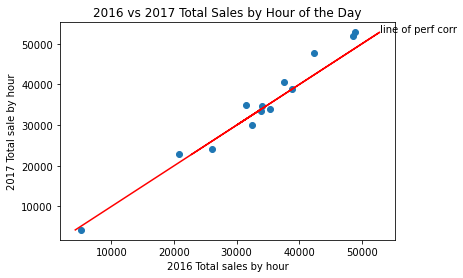

In [36]:
data1=df2016h.Sum
data2=df2017h.Sum
plt.scatter(data1, data2)
plt.plot(data2, data2, 'r')     #the line of perfect correlation
plt.annotate('line of perf corr', xy = (max(data2), max(data2)))
# Labels
plt.xlabel('2016 Total sales by hour')
plt.ylabel('2017 Total sale by hour')
plt.title('2016 vs 2017 Total Sales by Hour of the Day')
plt.show()

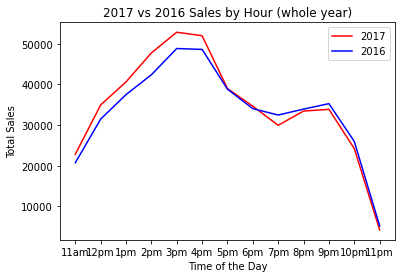

In [37]:
# create a list for store hours
store_hour_list = ['11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm','6pm','7pm','8pm','9pm','10pm','11pm']
plt.plot(store_hour_list, data2, 'r')
plt.plot(store_hour_list, data1, 'b')
plt.legend(['2017', '2016'])

# Labels
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.title('2017 vs 2016 Sales by Hour (whole year)')
plt.show()

In [38]:
# let's find the pearson correlation of each hour's sales individually
for i in range(12):
    print(pearsonr(df2016r.iloc[:, i], df2017r.iloc[:, i]))

(0.18952872393938996, 0.00027630952955896555)
(0.11272080992033508, 0.03155239023021931)
(0.21729083092648863, 2.896534562679488e-05)
(0.23503397326024672, 5.8320993723095205e-06)
(0.11472731902185336, 0.028628812873239894)
(0.2286344972640197, 1.0551325567311275e-05)
(0.21655529686647756, 3.087001153796864e-05)
(0.1446590483589539, 0.005692562162902241)
(0.15428128303573405, 0.0031668181177422084)
(0.15985195816751213, 0.0022208846490900567)
(0.13989282224983274, 0.007518501708339909)
(0.14481168441679682, 0.005641315788201682)


In [39]:
df2016r.head()

,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Daily
0,16.39,36.27,78.68,51.44,57.70,148.93,74.55,50.34,56.02,79.35,58.34,31.68,0.00,739.69
1,22.45,27.75,7.25,30.64,100.67,149.72,43.14,68.53,93.65,75.90,27.45,31.70,0.00,678.85
2,33.59,41.48,111.56,92.00,94.83,94.27,45.26,70.35,57.22,52.53,46.87,49.12,0.00,789.08
3,8.40,23.30,54.49,42.28,116.13,101.65,52.04,47.96,128.00,77.01,91.02,75.42,0.00,817.70
4,27.25,86.00,48.34,65.21,186.20,158.67,93.76,117.30,143.23,105.70,182.96,89.71,64.12,1368.45


In [40]:
# make df for seaborn plot
# first, get a df without the daily sales
df2016rm = df2016r.iloc[:, :13]
df2017rm = df2017r.iloc[:, :13]

# melt the dfs to prepare for seaborn plots
df2016m = pd.melt(df2016rm, value_vars=df2016rm.columns, var_name='Hour of Day', value_name='Hourly Sales')
df2017m = pd.melt(df2017rm, value_vars=df2017rm.columns, var_name='Hour of Day', value_name='Hourly Sales')

# add the year value to distinguish
df2016m['year'] = '2016'
df2017m['year'] = '2017'

df24m = pd.concat([df2016m, df2017m])
df24m.head()

,Hour of Day,Hourly Sales,year
0,11:00:00,16.39,2016
1,11:00:00,22.45,2016
2,11:00:00,33.59,2016
3,11:00:00,8.40,2016
4,11:00:00,27.25,2016


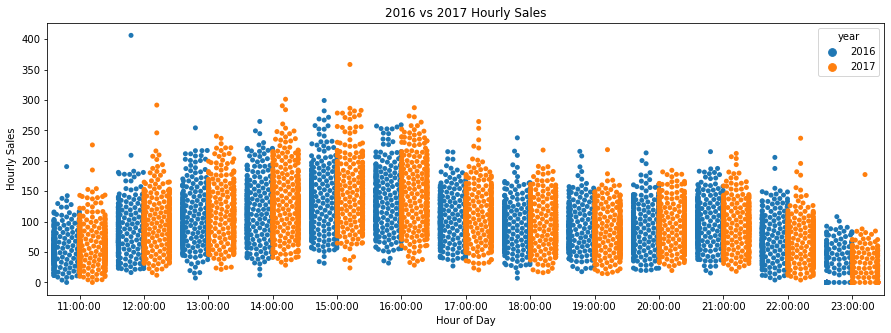

In [41]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('2016 vs 2017 Hourly Sales')
sns.swarmplot(x='Hour of Day', y='Hourly Sales', hue='year', data=df24m, dodge=True, ax=ax)

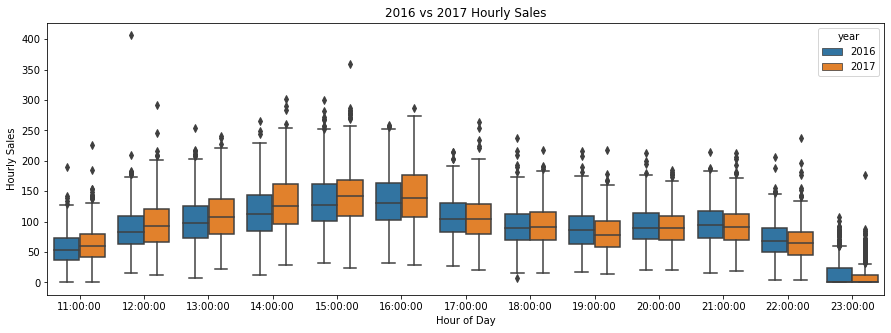

In [42]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('2016 vs 2017 Hourly Sales')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=df24m, dodge=True, ax=ax)

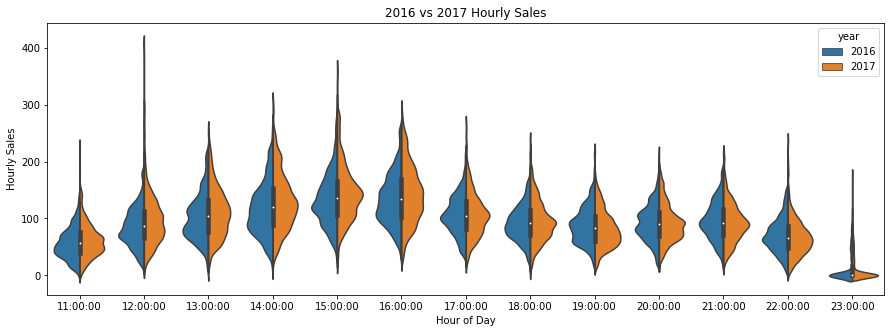

In [43]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('2016 vs 2017 Hourly Sales')
sns.violinplot(x='Hour of Day', y='Hourly Sales', hue='year', data=df24m, split=True, bw=0.2, ax=ax)

The sum of hourly sales of the day has the highest correlation, it's at 0.986, and the pvalue is very close to 0 (e-10). If we look at the visuals, it's very obvious! But if we're to check the correlation between all the same hours across 364 days in 2016 vs in 2017, the coreelation is low, however, if we're to look at the visuals from the seaborn plots, they're very close to one another. We will reject the null hypothesis, the hour of the day defintely has effect on sales.

# Hour of the Day by Day of the Week

In [44]:
# recall dow_iter_dcit used earlier, we'll use it again to iterate n add new column to df2016h/df2017h
dow_iter_dict

{'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}

In [45]:
# let's add the day of the week's sum to the df2016h
for dow, i in dow_iter_dict.items():
    df2016h[dow] = df2016h.iloc[:, i:364:7].apply(lambda row: row.sum(), axis = 1)
    df2017h[dow] = df2017h.iloc[:, i:364:7].apply(lambda row: row.sum(), axis = 1)
df2016h.tail()

Date,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,...,2016-12-31 00:00:00,2017-01-01 00:00:00,Sum,Mon,Tue,Wed,Thu,Fri,Sat,Sun
19:00:00,56.02,93.65,57.22,128.00,143.23,74.14,109.64,68.12,85.32,94.80,...,80.782308,85.69,32473.652702,4115.200000,4054.341563,4529.54,4448.455702,4920.781562,4649.494615,5755.839259
20:00:00,79.35,75.90,52.53,77.01,105.70,89.94,72.14,84.11,82.95,83.69,...,81.508077,62.06,33927.875702,4178.420000,4493.292500,4701.96,4647.028992,4969.622500,5249.616154,5687.935556
21:00:00,58.34,27.45,46.87,91.02,182.96,78.05,64.06,37.74,48.67,152.06,...,95.245385,117.45,35273.787212,4188.160000,4359.817187,5056.87,5064.964660,5982.917188,5440.430769,5180.627407
22:00:00,31.68,31.70,49.12,75.42,89.71,89.77,35.55,43.39,53.99,72.54,...,77.486154,89.25,25976.962118,2922.522581,3313.222581,3581.47,3546.396121,5082.882581,4323.342308,3207.125948
23:00:00,0.00,0.00,0.00,0.00,64.12,27.70,0.00,0.00,0.00,0.00,...,0.000000,0.00,5199.390000,0.000000,0.000000,0.00,0.000000,2897.650000,2301.740000,0.000000


In [46]:
# since Sunday~Thursday the store is closed at 23:00 we'll create 2 lists to iterate
sunthu_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Sun']
frisat_list = ['Fri', 'Sat']

In [47]:
# print the covariance/pearson, iloc[range(12)] since 23:00 is 0
for i in sunthu_list:
    print(i)
    covr_calc(df2016h[i].iloc[range(12)], df2017h[i].iloc[range(12)])
    print('')

Mon
covariance:[[1537590.0037942  1572180.91258374]
 [1572180.91258374 1828600.99886383]]
pearson:(0.9376111634787521, 6.7001162384314534e-06)

Tue
covariance:[[ 946050.24310024 1162941.87497128]
 [1162941.87497128 1528097.52260994]]
pearson:(0.9672202314806345, 2.8210057091900906e-07)

Wed
covariance:[[1032205.10560606 1233941.49476558]
 [1233941.49476558 1702686.70355423]]
pearson:(0.9307738966833516, 1.1138367458327639e-05)

Thu
covariance:[[ 947582.08241372 1014005.00124774]
 [1014005.00124774 1277011.70679877]]
pearson:(0.9217947655412873, 2.0182030554183764e-05)

Sun
covariance:[[3620033.54868716 3455953.34729851]
 [3455953.34729851 3537018.57291806]]
pearson:(0.9658126810667844, 3.4727043493639974e-07)



In [48]:
# print the covariance/pearson for fri/sat
for i in frisat_list:
    print(i)
    covr_calc(df2016h[i], df2017h[i])
    print('')

Fri
covariance:[[1593556.24110074 2011953.91869744]
 [2011953.91869744 2847944.49403219]]
pearson:(0.944427384597579, 1.1949144031490348e-06)

Sat
covariance:[[2818223.0625254  3379301.25646091]
 [3379301.25646091 4194127.21819652]]
pearson:(0.982920578839668, 1.9565254278085005e-09)



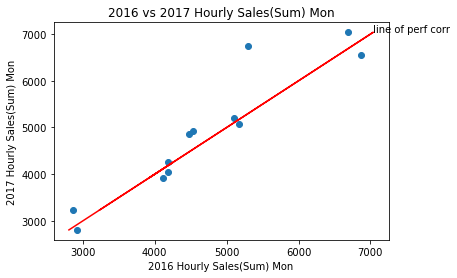

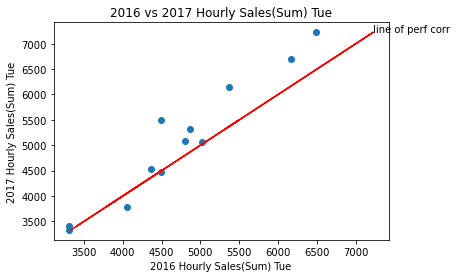

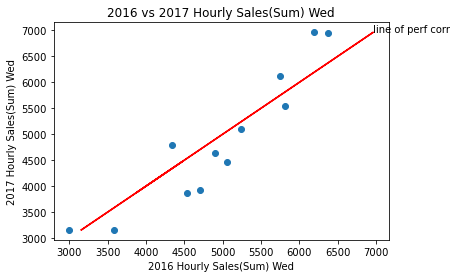

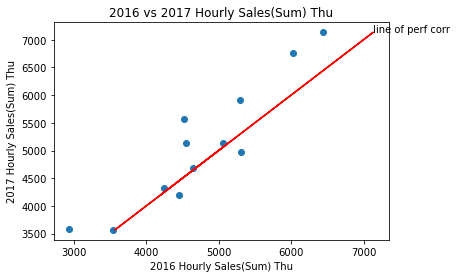

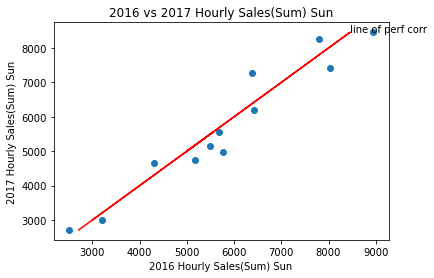

In [49]:
# use a plot for sun~thu
for i in sunthu_list:
    data1=df2016h[i].iloc[range(12)]
    data2=df2017h[i].iloc[range(12)]
    plt.scatter(data1, data2)
    plt.plot(data2, data2, 'r')     #the line of perfect correlation
    plt.annotate('line of perf corr', xy = (max(data2), max(data2)))
    # Labels
    plt.xlabel('2016 Hourly Sales(Sum) ' + i)
    plt.ylabel('2017 Hourly Sales(Sum) ' + i)
    plt.title('2016 vs 2017 Hourly Sales(Sum) ' + i)
    plt.show()

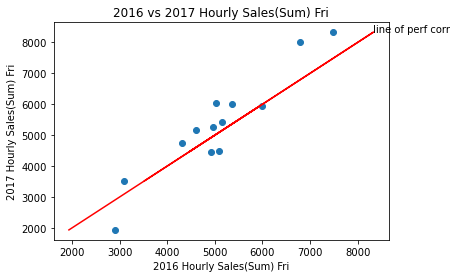

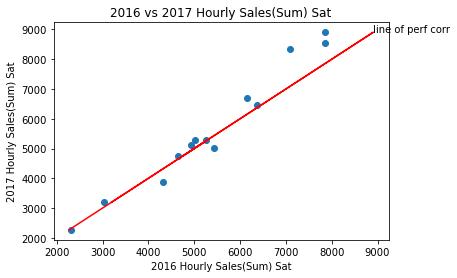

In [50]:
# use a plot for fri & sat
for i in frisat_list:
    data1=df2016h[i]
    data2=df2017h[i]
    plt.scatter(data1, data2)
    plt.plot(data2, data2, 'r')     #the line of perfect correlation
    plt.annotate('line of perf corr', xy = (max(data2), max(data2)))
    # Labels
    plt.xlabel('2016 Hourly Sales(Sum) ' + i)
    plt.ylabel('2017 Hourly Sales(Sum) ' + i)
    plt.title('2016 vs 2017 Hourly Sales(Sum) ' + i)
    plt.show()

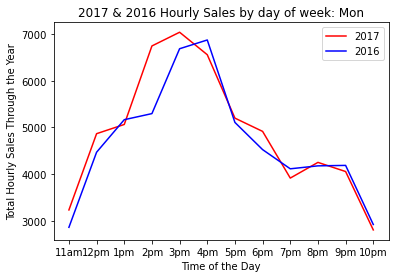

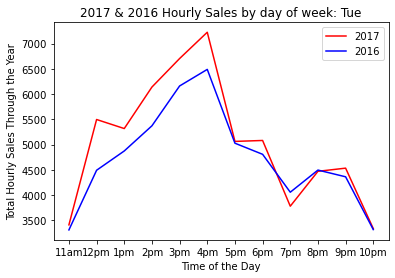

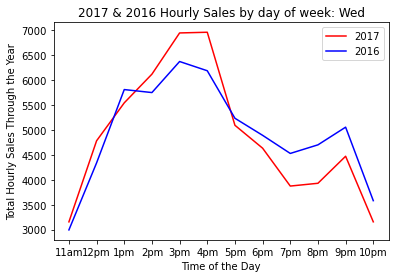

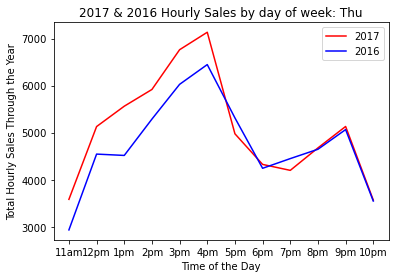

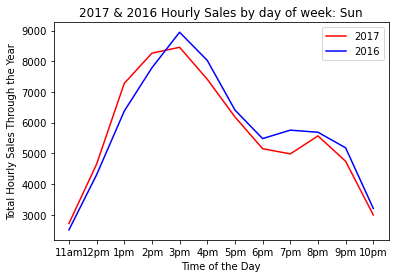

In [51]:
# 2017/2016 comparison, sun~thu
for j in sunthu_list:
    data1=[df2016h[j][i] for i in range(12)]
    data2=[df2017h[j][i] for i in range(12)]
    plt.plot(store_hour_list[:12], data2, 'r')
    plt.plot(store_hour_list[:12], data1, 'b')
    plt.legend(['2017', '2016'])
    plt.xlabel('Time of the Day')
    plt.ylabel('Total Hourly Sales Through the Year')
    plt.title('2017 & 2016 Hourly Sales by day of week: ' + j)
    plt.show()

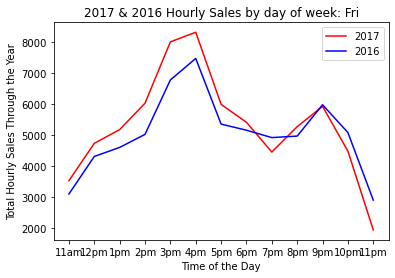

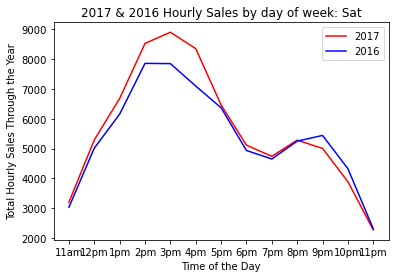

In [52]:
# 2017/2016 comparison, fri & sat
for j in frisat_list:
    data1=[df2016h[j][i] for i in range(13)]
    data2=[df2017h[j][i] for i in range(13)]
    plt.plot(store_hour_list, data2, 'r')
    plt.plot(store_hour_list, data1, 'b')
    plt.legend(['2017', '2016'])
    plt.xlabel('Time of the Day')
    plt.ylabel('Total Hourly Sales Through the Year')
    plt.title('2017 & 2016 Hourly Sales by day of week: ' + j)
    plt.show()

In [53]:
# let's check df2016r and see how to extract data into hour by day of week
df2016r.head()

,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Daily
0,16.39,36.27,78.68,51.44,57.70,148.93,74.55,50.34,56.02,79.35,58.34,31.68,0.00,739.69
1,22.45,27.75,7.25,30.64,100.67,149.72,43.14,68.53,93.65,75.90,27.45,31.70,0.00,678.85
2,33.59,41.48,111.56,92.00,94.83,94.27,45.26,70.35,57.22,52.53,46.87,49.12,0.00,789.08
3,8.40,23.30,54.49,42.28,116.13,101.65,52.04,47.96,128.00,77.01,91.02,75.42,0.00,817.70
4,27.25,86.00,48.34,65.21,186.20,158.67,93.76,117.30,143.23,105.70,182.96,89.71,64.12,1368.45


In [54]:
# this gives monday 11AM's sales
df2016r.iloc[0:364:7, 0].head()

0     16.39
7     11.35
14    39.05
21    42.05
28    63.04
Name: 11:00:00, dtype: float64

In [55]:
# print the pearson correlations
sunthu_iter_dict = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Sun': 6} #create this dict to iterate
sunthu_dict = {}
for i,j in sunthu_iter_dict.items():
    sunthu_dict[i] = [pearsonr(df2016r.iloc[j:364:7, k], df2017r.iloc[j:364:7, k]) for k in range(12)]

In [56]:
sunthu_dict

{'Mon': [(0.21899385827411447, 0.11880729684794111),
  (0.10784722848139423, 0.4466475117415785),
  (0.15434539802789776, 0.27461022784804606),
  (0.06953501225660644, 0.6242552038622954),
  (-0.01950879718479348, 0.8908149008902061),
  (-0.03877311584072472, 0.7849279401580185),
  (0.2293707122094192, 0.10190291097077181),
  (0.009881476168273916, 0.9445710807213306),
  (-0.049191549505788586, 0.7291082080110504),
  (0.05987425541076394, 0.6732860596703896),
  (0.26998696758516905, 0.05290556999337001),
  (-0.005805196099048032, 0.9674198143051644)],
 'Tue': [(0.23619502615009397, 0.09184055123548637),
  (0.3025808383436814, 0.0292358523076936),
  (0.2044180325913973, 0.1460444851410861),
  (0.2433707914106979, 0.08211293943801456),
  (0.13524880226436337, 0.33907896993152803),
  (0.1997145833483014, 0.15575349317481205),
  (0.15012455463759056, 0.288107673851694),
  (0.0760034377366494, 0.5922895069657387),
  (-0.09257037081453935, 0.513942556337908),
  (0.1570725972713549, 0.2661155

In [57]:
# too many numbers to distract, let's try to find the max value of the correlation and see how strong it is by dow
for key, value in sunthu_dict.items():
    print(key, ':', max(value))

Mon : (0.26998696758516905, 0.05290556999337001)
Tue : (0.3025808383436814, 0.0292358523076936)
Wed : (0.41046093015496, 0.0025083113065404003)
Thu : (0.30130575433719264, 0.029957598790367378)
Sun : (0.2761339650183405, 0.04753094211064997)


In [58]:
# do the same for fri&sat
frisat_iter_dict = {'Fri': 4, 'Sat': 5} #create this dict to iterate
frisat_dict = {}
for i,j in frisat_iter_dict.items():
    frisat_dict[i] = [pearsonr(df2016r.iloc[j:364:7, k], df2017r.iloc[j:364:7, k]) for k in range(13)]

In [59]:
frisat_dict

{'Fri': [(0.1487680390436218, 0.29253609396621444),
  (-0.17267297846655616, 0.22090933244143293),
  (0.1699299030641635, 0.2284439355865319),
  (-0.05437509853644243, 0.7018263897100034),
  (0.16567325214495082, 0.24048402906183136),
  (0.249954212247008, 0.07391870700416886),
  (0.04455701939386472, 0.7537865452964801),
  (-0.027755000592558955, 0.8451452551826174),
  (-0.14797325562208352, 0.29515118898307013),
  (0.1341407546378919, 0.34308738918295834),
  (0.08059665309289832, 0.5700432019124323),
  (-0.15455402577685037, 0.2739541235390757),
  (0.008846228251754969, 0.9503704828176094)],
 'Sat': [(0.4059594620861481, 0.0028265992055582544),
  (-0.021017280108889785, 0.8824297341977893),
  (0.09400787868596389, 0.5073998812099494),
  (0.060152023169944724, 0.6718560852378911),
  (-0.1535866926435925, 0.27700501393548727),
  (0.24274111656471217, 0.08293268240560328),
  (0.24883031839192649, 0.07526973948913648),
  (0.4294479112463971, 0.0014879810561207111),
  (0.21763374183056633

In [60]:
for key, value in frisat_dict.items():
    print(key, ':', max(value))

Fri : (0.249954212247008, 0.07391870700416886)
Sat : (0.4294479112463971, 0.0014879810561207111)


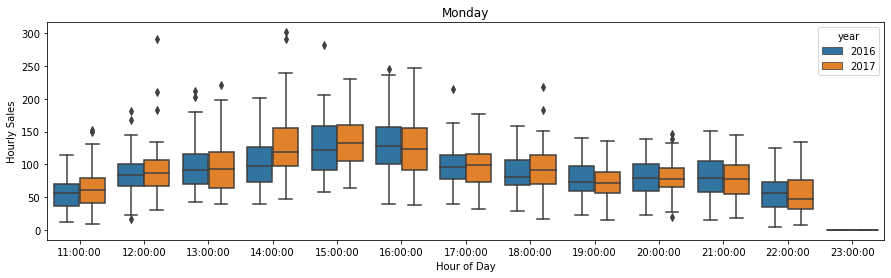

In [61]:
# Let's make boxplots of them to see
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Monday')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=(df24m.iloc[0::7]), dodge=True, ax=ax)

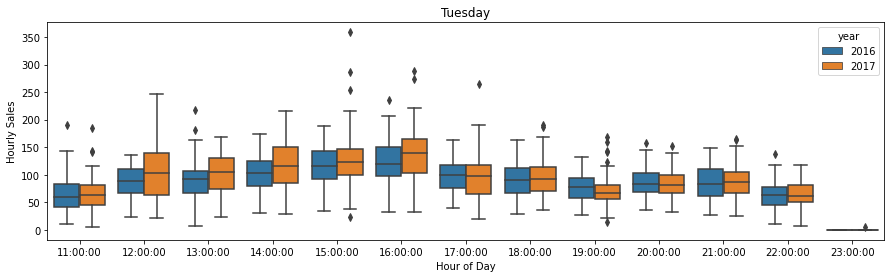

In [62]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Tuesday')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=(df24m.iloc[1::7]), dodge=True, ax=ax)

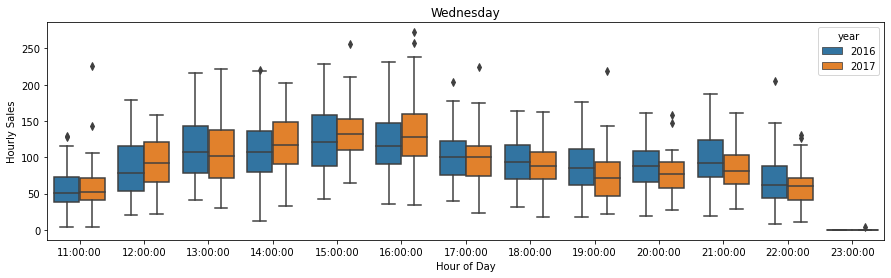

In [63]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Wednesday')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=(df24m.iloc[2::7]), dodge=True, ax=ax)

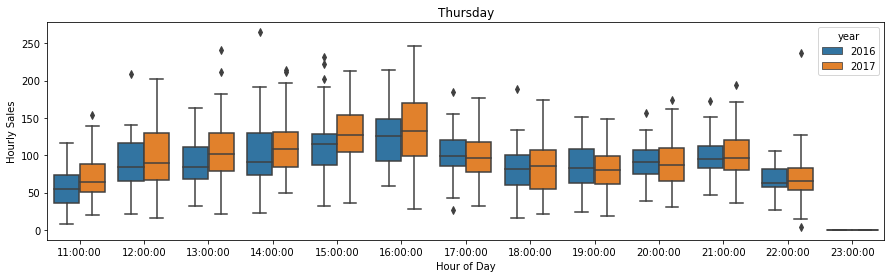

In [64]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Thursday')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=(df24m.iloc[3::7]), dodge=True, ax=ax)

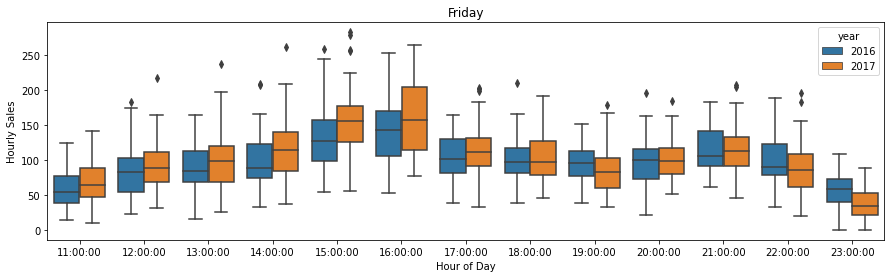

In [65]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Friday')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=(df24m.iloc[4::7]), dodge=True, ax=ax)

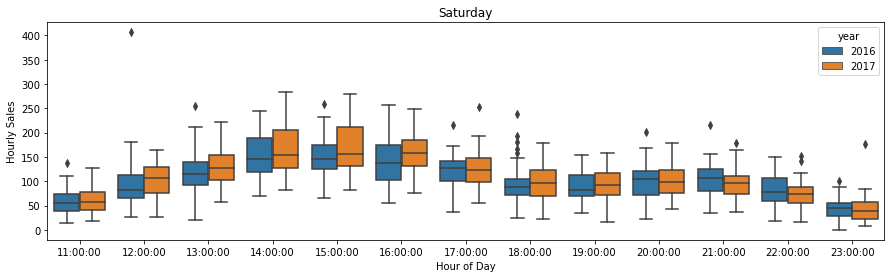

In [66]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Saturday')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=(df24m.iloc[5::7]), dodge=True, ax=ax)

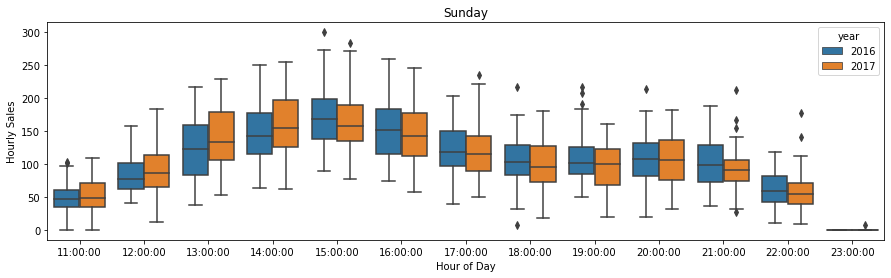

In [67]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Sunday')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=(df24m.iloc[6::7]), dodge=True, ax=ax)

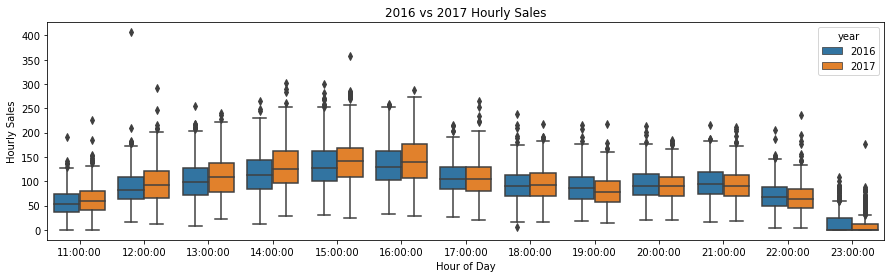

In [68]:
# recall the hourly sales figure
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('2016 vs 2017 Hourly Sales')
sns.boxplot(x='Hour of Day', y='Hourly Sales', hue='year', data=df24m, dodge=True, ax=ax)

When we do the correlation test for the total hourly sales by day of the week, all the correlation were over 0.90 with pvalue close to 0. But when we do the correlation of each hour by hour, the correlation were a lot weaker/doesn't exist, however, if we're to look at the visuals, they're all rather close to each other. Then lets take a look at the hourly sales between 2016 and 2017, the main difference is that the whole year's hourly sales has less variation when compared to hour of the day by day of week. This means the standard deviation for hour of the day in a whole year is much smaller than hour of day by day of week.

# EDA Conclusion

If we're to compare the sum of the sales whether it's by day of week or by hour of the day or by both hour of the day and day of the week. All these variables have strong correlation (0.900+), even when if the correlation was samll (when we calculate the correlation not by the sum of the sales by for each day or hour), when viewed in visual, they're rather close to each other. Time is definitely a variable that may be used to predict the sales.